<a href="https://colab.research.google.com/github/wildtigress/DATA-ANALYSIS-/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install -q kaggle


In [37]:
from google.colab import files
files.upload()  # Select your kaggle.json file when prompted


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"samijklhh","key":"5b1cd8fde793faa8d9fd70ed4803863a"}'}

In [38]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [40]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json   # rename during copy
!chmod 600 ~/.kaggle/kaggle.json


In [41]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [42]:
!unzip brain-tumor-mri-dataset.zip -d data


Streaming output truncated to the last 5000 lines.
  inflating: data/Training/glioma/Tr-gl_0712.jpg  
  inflating: data/Training/glioma/Tr-gl_0713.jpg  
  inflating: data/Training/glioma/Tr-gl_0714.jpg  
  inflating: data/Training/glioma/Tr-gl_0715.jpg  
  inflating: data/Training/glioma/Tr-gl_0716.jpg  
  inflating: data/Training/glioma/Tr-gl_0717.jpg  
  inflating: data/Training/glioma/Tr-gl_0718.jpg  
  inflating: data/Training/glioma/Tr-gl_0719.jpg  
  inflating: data/Training/glioma/Tr-gl_0720.jpg  
  inflating: data/Training/glioma/Tr-gl_0721.jpg  
  inflating: data/Training/glioma/Tr-gl_0722.jpg  
  inflating: data/Training/glioma/Tr-gl_0723.jpg  
  inflating: data/Training/glioma/Tr-gl_0724.jpg  
  inflating: data/Training/glioma/Tr-gl_0725.jpg  
  inflating: data/Training/glioma/Tr-gl_0726.jpg  
  inflating: data/Training/glioma/Tr-gl_0727.jpg  
  inflating: data/Training/glioma/Tr-gl_0728.jpg  
  inflating: data/Training/glioma/Tr-gl_0729.jpg  
  inflating: data/Training/glio

In [43]:
# ✅ Step 1: Install Dependencies (if not already installed)
!pip install tensorflow matplotlib

# ✅ Step 2: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [50]:
#  Make sure your dataset is in /content/data/yes and /content/data/no

IMG_HEIGHT = 256
IMG_WIDTH = 256
BATCH_SIZE = 32
EPOCHS = 20

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/data',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/data',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.


In [51]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output: Tumor / No Tumor
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, model_checkpoint]
)


Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7959 - loss: 0.9396

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


176/176 ━━━━━━━━━━━━━━━━━━━━ 1005s 6s/step - accuracy: 0.7960 - loss: 0.9394 - val_accuracy: 0.6118 - val_loss: 1.0536
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8021 - loss: 0.8017

176/176 ━━━━━━━━━━━━━━━━━━━━ 1007s 6s/step - accuracy: 0.8021 - loss: 0.8017 - val_accuracy: 0.8127 - val_loss: 0.6019
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1032s 6s/step - accuracy: 0.8045 - loss: 0.7344 - val_accuracy: 0.8127 - val_loss: 0.5359
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 987s 6s/step - accuracy: 0.8116 - loss: 0.5845 - val_accuracy: 0.8084 - val_loss: 0.9546
Epoch 5/20
174/176 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.8090 - loss: 0.6029

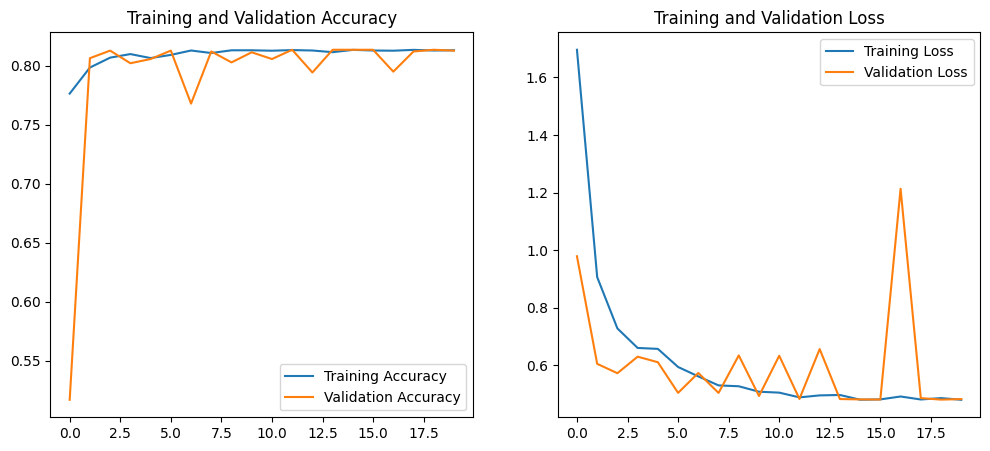

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()
